In [1]:
import numpy as np
from random import randint, seed
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
import time
from PIL import Image
from IPython import display
from collections import defaultdict
import math
import sys
from scipy import signal
from scipy.stats import kurtosis
sys.path = ["../pyIMS/"] + sys.path

from pIMZ.regions import SpectraRegion
from pIMZ.imzml import IMZMLExtract
from pIMZ.clustering import *

import random
random.seed(42)

Opening regions file for /usr/local/hdd/rita/msimaging/190724_AR_ZT1_Proteins/190724_AR_ZT1_Proteins_spectra.imzML
0 1020 1077 307 416
1 1298 1357 323 418
2 690 747 315 416
3 353 429 290 411


Checked 1000 spectra. All have same m/z Values.            |   3% ETA:  0:00:16
Checked 1000 spectra. All have same m/z Values.
Checked 1000 spectra. All have same m/z Values.
All have same m/z Values.
All have same m/z Values.
All have same m/z Values.


0 ((1020, 1077, 307, 416), 5924)
1 ((1298, 1357, 323, 418), 5225)
2 ((690, 747, 315, 416), 5506)
3 ((353, 429, 290, 411), 8657)


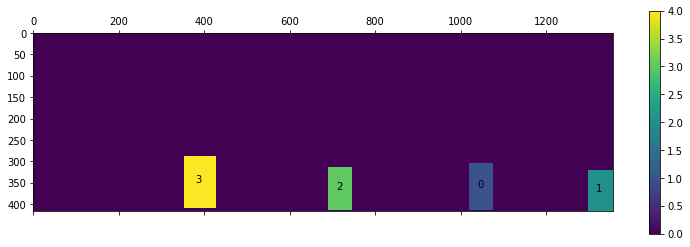

In [4]:
imze = IMZMLExtract("/usr/local/hdd/rita/msimaging/190724_AR_ZT1_Proteins/190724_AR_ZT1_Proteins_spectra.imzML")
_ = imze.list_regions()

In [3]:
spectra_orig2 = imze.get_region_array(3, makeNullLine=True)
spectra_norm2 = imze.normalize_region_array(spectra_orig2, normalize="tic")
spectra_smooth2 = imze.smooth_region_array(region_array=spectra_norm2, method='kaiser', window_length=10)
spectra_baseline2 = imze.normalize_region_array(region_array=spectra_smooth2, normalize='baseline_cor_local', division=100, simple=True)
(spectra_peaks2, peaks2) = imze.to_peaks(spectra_baseline2, imze.mzValues)
spec_peaks2 = SpectraRegion(spectra_peaks2, peaks2)

Fetching region range
|##########################################################| 100% Time: 0:00:00
Fetching region shape
|##########################################################| 100% Time: 0:00:00
Found region 3 with shape (47, 56, 8000)
Fetching region spectra
|##########################################################| 100% Time: 0:00:00
|##########################################################| 100% Time: 0:00:00
Finished region 3 with shape (47, 56, 8000) (0 padded pixels)
|##########################################################| 100% Time: 0:00:00
|##########################################################| 100% Time: 0:00:00


resolution: 0.42493560064609426
minMZ: 99.85986615183215 100.18129684068533
maxMZ: 3499.3446713205863 3499.241166408772
100.18129684068533 3499.241166408772
99.85986615183215 3499.3446713205863
(47, 56, 8001)
(8001,)
background intensity: 0.12468043938791387 -0.18577308358020256 196.73612118038065


|##########################################################| 100% Time: 0:00:01
2022-01-05 08:38:30,385  SpectraRegion  INFO: Added new Stream Handler


Identified peaks for 835 of 8001 fields
Returning Peaks


In [6]:
all_spectra = spec_peaks2.region_array.reshape(-1, spec_peaks2.region_array.shape[2])
centroid, label = scipy.cluster.vq.kmeans2(elem_matrix, k=10, iter=10, minit='++')

In [15]:
elem_matrix, _ = spec_peaks2.prepare_elem_matrix()
print(elem_matrix.shape, all_spectra.shape)

Elem Matrix (2632, 8001)
(2632, 8001) (2632, 8001)


2022-01-05 08:25:51,879  SpectraRegion  INFO: Calculating clusters
2022-01-05 08:25:53,119  SpectraRegion  INFO: Calculating clusters done
2022-01-05 08:25:53,131  SpectraRegion  INFO: Calculating clusters saved


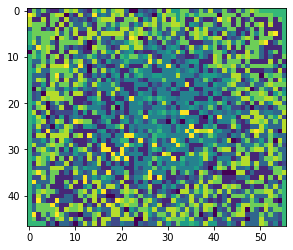

In [5]:
spec_peaks2.segment(method='KMEANS', number_of_regions=10)
plt.imshow(spec_peaks2.segmented)

Elem Matrix (2632, 8001)


/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:817: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
2022-01-05 08:39:42,645  ModifiedKMeansClusterer  INFO: Finished early, iteration 31.


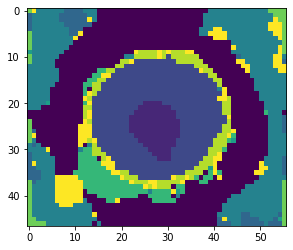

In [4]:
clustering2 = ModifiedKMeansClusterer(spec_peaks2)
clustering2.fit(num_target_clusters=10, init_mode='kmeans', distance='tibshirani')
plt.imshow(clustering2.segmentation())

Elem Matrix (2632, 8001)


/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: divide by zero encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
|##########################################################| 100% Time: 0:03:55


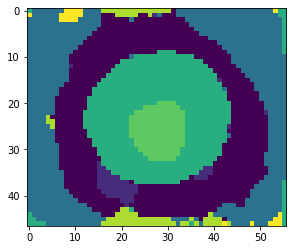

In [ ]:
clustering2 = ModifiedKMeansClusterer(spec_peaks2)
clustering2.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering2.segmentation())

In [ ]:
spectra_orig2 = imze.get_region_array(3, makeNullLine=True)
spectra_norm2 = imze.normalize_region_array(spectra_orig2, normalize="tic")
spectra_smooth2 = imze.smooth_region_array(region_array=spectra_norm2, method='kaiser', window_length=10)
spectra_baseline2 = imze.normalize_region_array(region_array=spectra_smooth2, normalize='baseline_cor_local', division=100, simple=False)
(spectra_peaks2, peaks2) = imze.to_peaks(spectra_baseline2, imze.mzValues)
spec_peaks2 = SpectraRegion(spectra_peaks2, peaks2)

Fetching region range
|##########################################################| 100% Time: 0:00:00
Fetching region shape
|##########################################################| 100% Time: 0:00:00
Found region 3 with shape (47, 56, 8000)
Fetching region spectra
|##########################################################| 100% Time: 0:00:00
|##########################################################| 100% Time: 0:00:00
Finished region 3 with shape (47, 56, 8000) (0 padded pixels)
|##########################################################| 100% Time: 0:00:00
|##########################################################| 100% Time: 0:00:00


resolution: 0.42493560064609426
minMZ: 99.85986615183215 100.18129684068533
maxMZ: 3499.3446713205863 3499.241166408772
100.18129684068533 3499.241166408772
99.85986615183215 3499.3446713205863
(47, 56, 8001)
(8001,)
background intensity: 0.0697734820014394 -0.3085190798955806 196.35691705818778


Identified peaks for 844 of 8001 fields
Returning Peaks


Elem Matrix (2632, 8001)


|##########################################################| 100% Time: 0:03:53


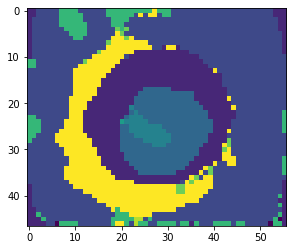

In [6]:
clustering = ModifiedKMeansClusterer(spec_peaks2)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (2632, 8001)


|##########################################################| 100% Time: 0:03:50


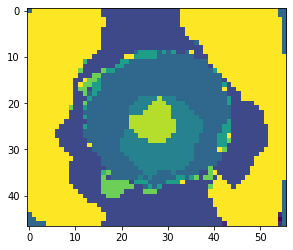

In [7]:
clustering = ModifiedKMeansClusterer(spec_peaks2)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (2632, 8001)


/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
|##########################################################| 100% Time: 0:03:55


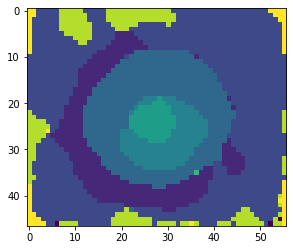

In [5]:
clustering2 = ModifiedKMeansClusterer(spec_peaks2)
clustering2.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering2.segmentation())

Elem Matrix (2632, 8001)


/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:1059: RuntimeWarning: invalid value encountered in double_scalars
  d_ik   = (seg_centroid[mz] - overall_centroid[mz])/(m*(s_list[mz]+s_0))
/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:1177: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sqSStats)


Finishing iterations due to same result after 29 iterations


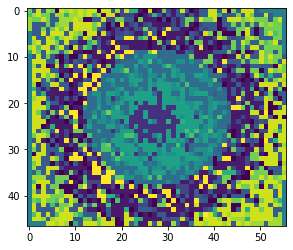

In [114]:
clustering2_2 = ShrunkenCentroidClusterer(spec_peaks2)
clustering2_2.fit(num_target_clusters=15)
plt.imshow(clustering2_2.segmentation())

In [106]:
spectra_orig = imze.get_region_array(1, makeNullLine=True)
spectra_norm = imze.normalize_region_array(spectra_orig, normalize="tic")

Fetching region range
Fetching region range
|##########################################################| 100% Time: 0:00:00
Fetching region shape
Fetching region shape
|##########################################################| 100% Time: 0:00:00
Found region 1 with shape (51, 62, 8000)
Found region 1 with shape (51, 62, 8000)
Fetching region spectra
Fetching region spectra
|##########################################################| 100% Time: 0:00:00
|##########################################################| 100% Time: 0:00:00
Finished region 1 with shape (51, 62, 8000) (0 padded pixels)
Finished region 1 with shape (51, 62, 8000) (0 padded pixels)
|##########################################################| 100% Time: 0:00:00


In [4]:
spec_norm = SpectraRegion(spectra_norm, imze.mzValues)

2021-12-15 10:15:59,851  SpectraRegion  INFO: Added new Stream Handler


Elem Matrix (3162, 8000)


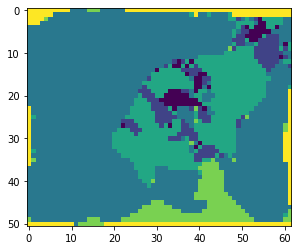

In [5]:
clustering = ModifiedKMeansClusterer(spec_norm)
clustering.fit(num_target_clusters=6, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

# Smoothing with Kaiser filter

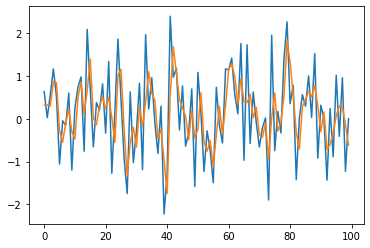

In [11]:
L=2 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = np.ones(1)  #denominator co-effs of filter transfer function
x = np.random.randn(100) #100 random samples for x
#y = signal.convolve(x,b) #filter output using convolution

y = signal.lfilter(b,a,x) #filter output using lfilter function

plt.plot(range(x.shape[0]), x)
plt.plot(range(y.shape[0]), y)

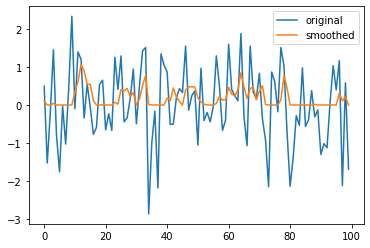

In [12]:
L=2 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = np.ones(1)  #denominator co-effs of filter transfer function
x = np.random.randn(100) #random samples for x

smoothed_x = imze.smooth_spectrum(spectrum=x, method="kaiser", window_length=5)

plt.plot(range(x.shape[0]), x, label='original')
plt.plot(range(smoothed_x.shape[0]), smoothed_x, label='smoothed')
plt.legend()

In [13]:
def smooth(array_region, L=10):
    #https://www.gaussianwaves.com/2010/11/moving-average-filter-ma-filter-2/
    #L-point filter
    b = (np.ones(L))/L #numerator co-effs of filter transfer function
    a = np.ones(1)  #denominator co-effs of filter transfer function
    new_region_array = np.zeros(array_region.shape)
    for i in range(array_region.shape[0]):
        for j in range(array_region.shape[1]):
            x = array_region[i,j]
            #y = signal.convolve(x,b)
            new_region_array[i,j] = signal.lfilter(b,a,x)
    return new_region_array

In [5]:
#spectra_smooth = smooth(spectra_norm)
spectra_smooth = imze.smooth_region_array(region_array=spectra_norm, method='kaiser', window_length=10)

|##########################################################| 100% Time: 0:00:00


In [15]:
spectra_baseline = imze.normalize_region_array(spectra_smooth, normalize='baseline_cor')

In [ ]:
base = scipy.interpolate.interp1d()

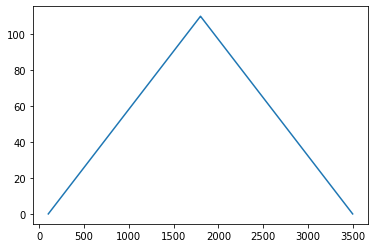

In [14]:
#baseline= interp1([x(1) x_int x(end)],[m_int(1) m_int 0],x);
baseline = scipy.interpolate.interp1d([imze.mzValues[0], imze.mzValues[imze.mzValues.shape[0]//2], imze.mzValues[imze.mzValues.shape[0]-1]], [np.min(spectra_smooth), (np.min(spectra_smooth)+np.max(spectra_smooth))/2, 0], kind='linear')
plt.plot(imze.mzValues, baseline(imze.mzValues))

In [15]:
from scipy.signal import argrelextrema

In [25]:
# for local maxima
max_mz = argrelextrema(spectra_smooth[20,20], np.greater)
max_mz[0].shape

(1982,)

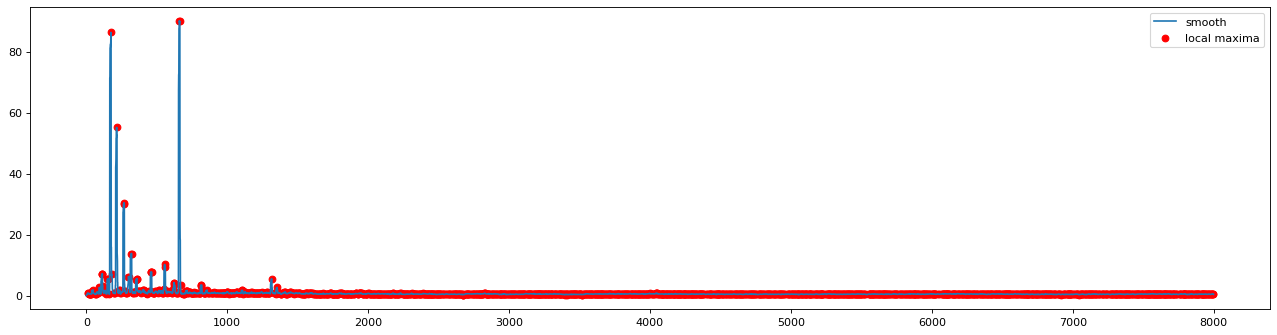

In [24]:
#smooth factor L=10
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(range(spectra_smooth[20,20].shape[0]), spectra_smooth[20,20], label='smooth')
plt.scatter(max_mz[0], spectra_smooth[20,20][max_mz[0]], label='local maxima', c='red')
plt.legend()

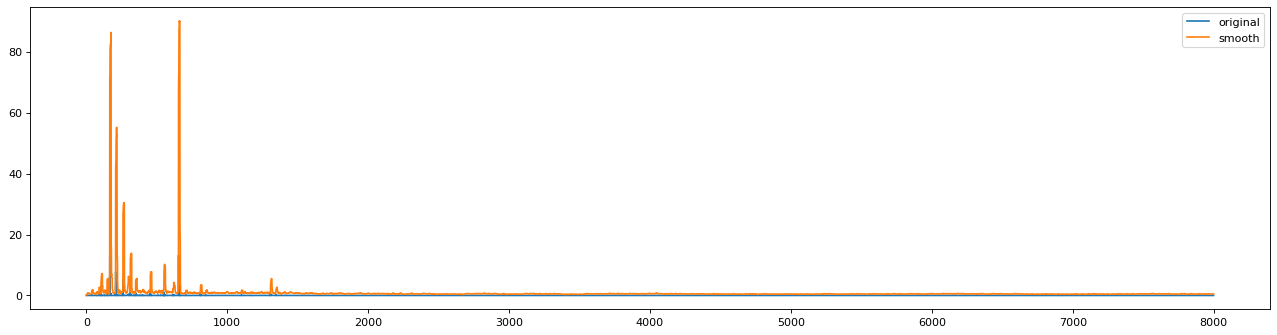

In [7]:
#smooth factor L=10
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(range(spectra_orig[20,20].shape[0]), spectra_orig[20,20], label='original')
plt.plot(range(spectra_smooth[20,20].shape[0]), spectra_smooth[20,20], label='smooth')
#plt.plot(baseline(range(spectra_smooth[20,20].shape[0])), spectra_smooth[20,20], label='smooth+baseline')
plt.legend()

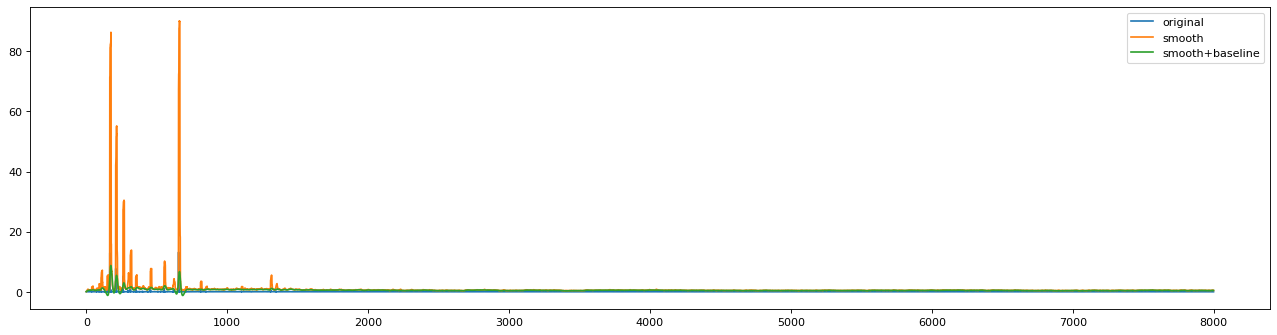

In [16]:
#smooth factor L=10
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(range(spectra_orig[20,20].shape[0]), spectra_orig[20,20], label='original')
plt.plot(range(spectra_smooth[20,20].shape[0]), spectra_smooth[20,20], label='smooth')
plt.plot(range(spectra_baseline[20,20].shape[0]), spectra_baseline[20,20], label='smooth+baseline')
plt.legend()

In [17]:
(spectra_peaks, peaks) = imze.to_peaks(spectra_smooth, imze.mzValues)

resolution: 0.42493560064609426
minMZ: 99.85986615183215 100.18129684068533
maxMZ: 3499.3446713205863 3499.241166408772
100.18129684068533 3499.241166408772
99.85986615183215 3499.3446713205863
(51, 62, 8001)
(8001,)
background intensity: 0.3120399206876755 0.0 219.3587612807751


Identified peaks for 2285 of 8001 fields
Returning Peaks


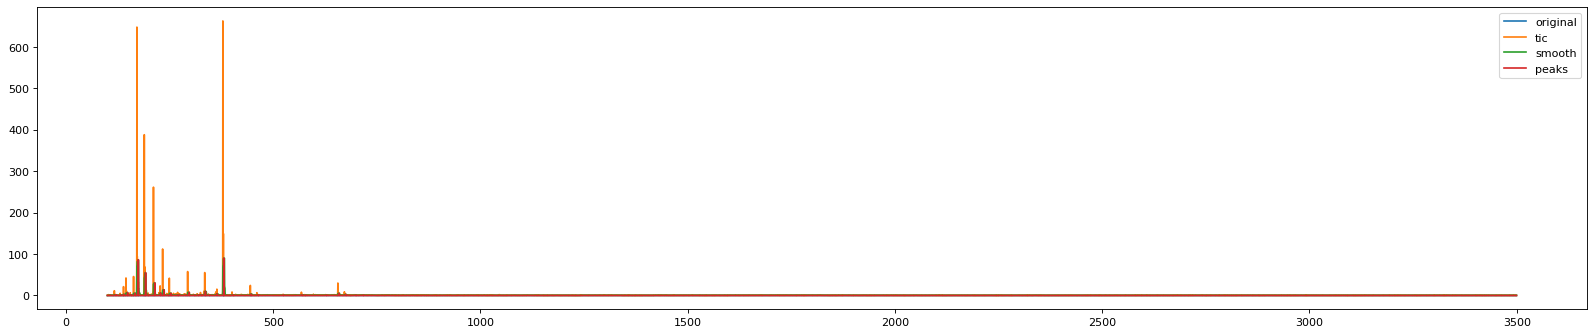

In [107]:
plt.figure(figsize=(25, 5), dpi=80)
plt.plot(imze.mzValues, spectra_orig[20,20], label='original')
plt.plot(imze.mzValues, spectra_norm[20,20], label='tic')
plt.plot(imze.mzValues, spectra_smooth[20,20], label='smooth')
plt.plot(peaks, spectra_peaks[20,20], label='peaks')
plt.legend()

In [108]:
spec_peaks = SpectraRegion(spectra_peaks, peaks)

Elem Matrix (3162, 8001)


/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: divide by zero encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
|##########################################################| 100% Time: 0:05:14


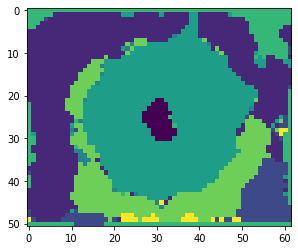

In [109]:
clustering = ModifiedKMeansClusterer(spec_peaks)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (3162, 8001)


../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: divide by zero encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)



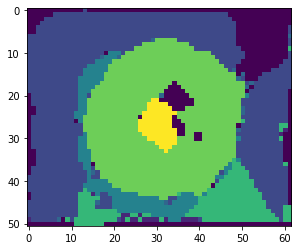

In [18]:
clustering = ModifiedKMeansClusterer(spec_peaks)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (3162, 8001)


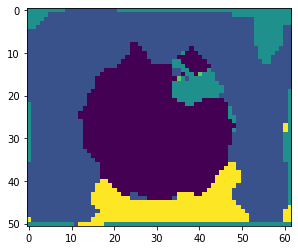

In [24]:
clustering2 = ModifiedKMeansClusterer(spec_peaks)
clustering2.fit(num_target_clusters=5, init_mode='random')
plt.imshow(clustering2.segmentation())

Elem Matrix (3162, 8001)


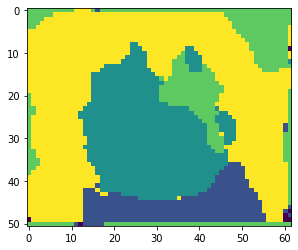

In [25]:
clustering3 = ModifiedKMeansClusterer(spec_peaks)
clustering3.fit(num_target_clusters=5, init_mode='random_centroids')
plt.imshow(clustering3.segmentation())

Elem Matrix (3162, 8001)


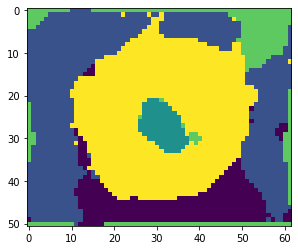

In [53]:
clustering3 = ModifiedKMeansClusterer(spec_peaks)
clustering3.fit(num_target_clusters=5, init_mode='random_centroids')
plt.imshow(clustering3.segmentation())

Elem Matrix (3162, 8001)


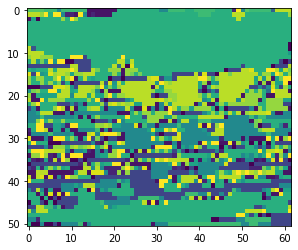

In [27]:
clustering3 = ModifiedKMeansClusterer(spec_peaks)
clustering3.fit(num_target_clusters=20, max_iterations = 10, init_mode='random_2normdist', distance='sasa')
plt.imshow(clustering3.segmentation())

# Attempting to call peaks and cluster after baseline correction and Kaiser filter

In [28]:
(spectra_peaks2, peaks2) = imze.to_peaks(spectra_baseline, imze.mzValues)
spec_peaks2 = SpectraRegion(spectra_peaks2, peaks2)

resolution: 0.42493560064609426
minMZ: 99.85986615183215 100.18129684068533
maxMZ: 3499.3446713205863 3499.241166408772
100.18129684068533 3499.241166408772
99.85986615183215 3499.3446713205863
(51, 62, 8001)
(8001,)
background intensity: 0.27088739996599254 -6.252288168790436 22.866155478235154


Identified peaks for 678 of 8001 fields
Returning Peaks


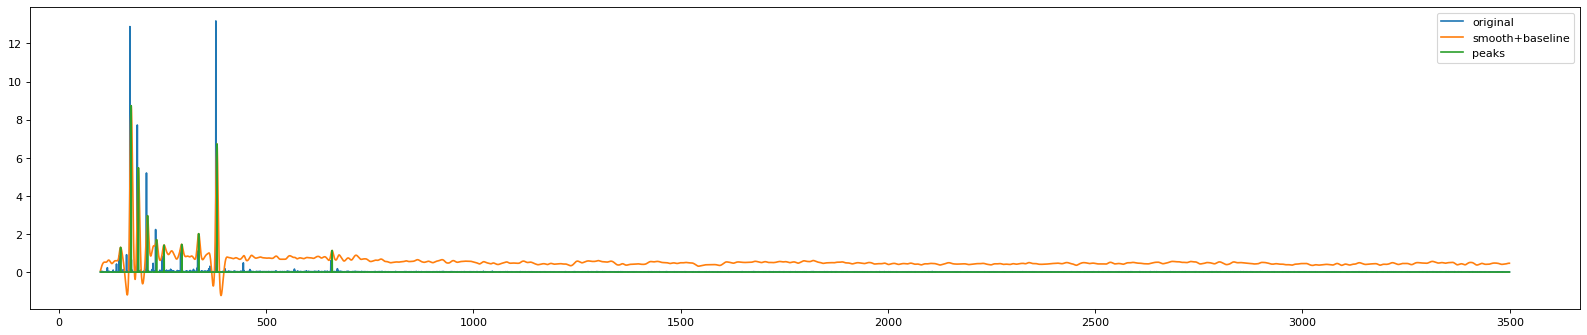

In [29]:
plt.figure(figsize=(25, 5), dpi=80)
plt.plot(imze.mzValues, spectra_orig[20,20], label='original')
plt.plot(imze.mzValues, spectra_baseline[20,20], label='smooth+baseline')
plt.plot(peaks2, spectra_peaks2[20,20], label='peaks')
plt.legend()

In [30]:
spec_peaks2 = SpectraRegion(spectra_peaks2, peaks2)

Elem Matrix (3162, 8001)


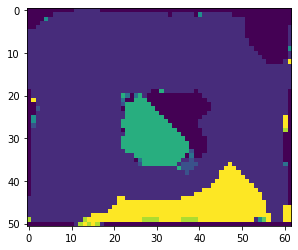

In [36]:
clustering = ModifiedKMeansClusterer(spec_peaks2)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (3162, 8001)


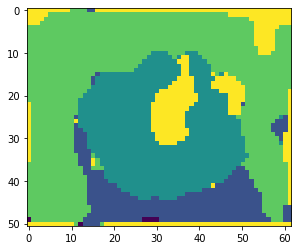

In [37]:
clustering2 = ModifiedKMeansClusterer(spec_peaks2)
clustering2.fit(num_target_clusters=5, init_mode='random')
plt.imshow(clustering2.segmentation())

Elem Matrix (3162, 8001)


../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)



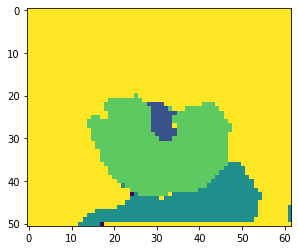

In [41]:
clustering3 = ModifiedKMeansClusterer(spec_peaks2)
clustering3.fit(num_target_clusters=5, init_mode='random_centroids')
plt.imshow(clustering3.segmentation())

Elem Matrix (3162, 8001)


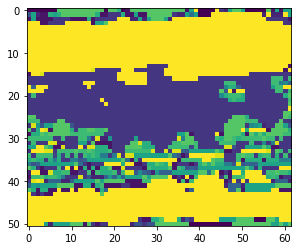

In [34]:
clustering3 = ModifiedKMeansClusterer(spec_peaks2)
clustering3.fit(num_target_clusters=20, max_iterations = 10, init_mode='random_2normdist', distance='sasa')
plt.imshow(clustering3.segmentation())

# Adding blockwise Kurtosis test

In [39]:
my_spectrum = spectra_smooth[20,20]
division = 100
nblocks = len(my_spectrum)//division
my_updated = np.zeros(my_spectrum.shape)
ref_value = np.mean(my_spectrum)

x_1 = -1
s_int_1 = -1
m_int_1 = -1

for block in range(1,nblocks):
    interval = my_spectrum[1+(block-1)*division:block*division]

    if x_1 == -1 and s_int_1 == -1:
        m_int_1 = np.min(interval)
        x_1 = np.mean(imze.mzValues[1+(block-1)*division:block*division])
        s_int_1 = np.std(interval)
    if kurtosis(interval) > 1 and np.mean(interval)<ref_value:
        #my_updated[1+(block-1)*division:block*division] = interval
        m_int = np.min(interval)
        v_int = np.mean(interval)
        x_int = np.mean(imze.mzValues[1+(block-1)*division:block*division])
        s_int = np.std(interval)

print(m_int, v_int, x_int, s_int)

baseline= scipy.interpolate.interp1d([imze.mzValues[0], x_int, imze.mzValues[imze.mzValues.shape[0]-1]],[m_int_1, m_int, 0])
new_base = baseline(imze.mzValues)

sign=my_spectrum-new_base

'''
sigma = scipy.interpolate.interp1d([imze.mzValues[0], x_int, imze.mzValues[imze.mzValues.shape-1]],[s_int_1, s_int, 0])
new_mz = sigma(imze.mzValues)

base = scipy.interpolate.interp1d([imze.mzValues[0], x_int, imze.mzValues[imze.mzValues.shape-1]],[b_int(1) b_int 0],x);

noise_lev=norm_factor*(base+iupac_thres*sigma);
'''

0.38922256082296375 0.4798169303873573 2033.6382797804022 0.04263511202724044


'\nsigma = scipy.interpolate.interp1d([imze.mzValues[0], x_int, imze.mzValues[imze.mzValues.shape-1]],[s_int_1, s_int, 0])\nnew_mz = sigma(imze.mzValues)\n\nbase = scipy.interpolate.interp1d([imze.mzValues[0], x_int, imze.mzValues[imze.mzValues.shape-1]],[b_int(1) b_int 0],x);\n\nnoise_lev=norm_factor*(base+iupac_thres*sigma);\n'

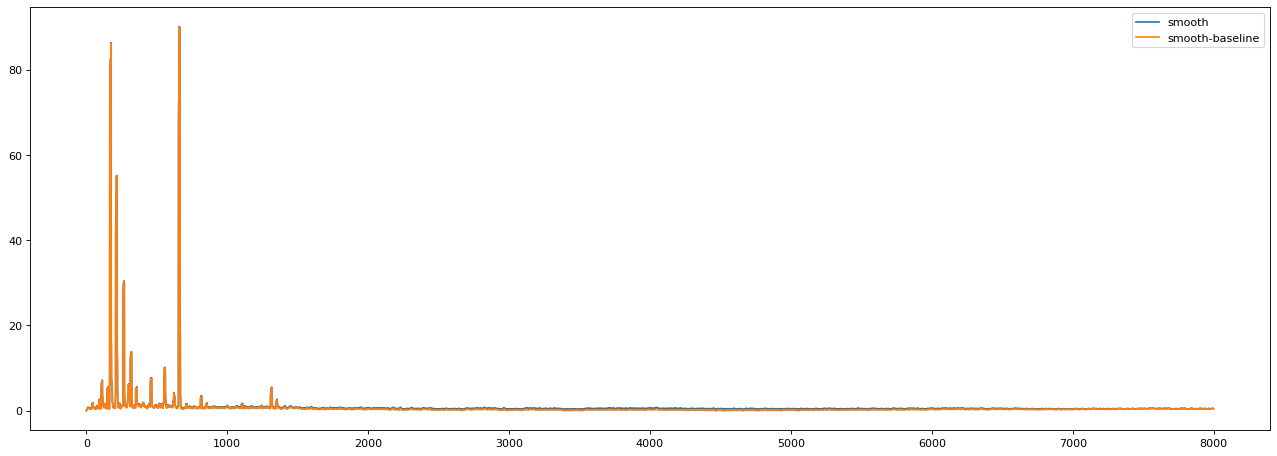

In [43]:
plt.figure(figsize=(20, 7), dpi=80)
#plt.plot(range(spectra_orig[20,20].shape[0]), spectra_orig[20,20], label='original')
plt.plot(range(spectra_smooth[20,20].shape[0]), spectra_smooth[20,20], label='smooth')
plt.plot(range(spectra_smooth[20,20].shape[0]), sign, label='smooth-baseline')
plt.legend()

In [170]:
def new_basline_corr(array_region, division = 100):
    new_region_array = np.zeros(array_region.shape)
    noise_lev_array = np.zeros(array_region.shape)
    for i in range(array_region.shape[0]):
        for j in range(array_region.shape[1]):
            spectrum = array_region[i,j]        
            nblocks = len(spectrum)//division
            ref_value = np.mean(spectrum)

            x_1 = -1
            s_int_1 = -1
            m_int_1 = -1
            v_int_1 = -1

            m_int = 0
            v_int = 0
            x_int = 0
            s_int = 0
            m_vec = list()
            v_vec = list()
            x_vec = list()
            s_vec = list()

            for block in range(1,nblocks):
                interval = spectrum[1+(block-1)*division:block*division]

                if x_1 == -1 and s_int_1 == -1:
                    m_int_1 = np.min(interval)
                    x_1 = np.mean(imze.mzValues[1+(block-1)*division:block*division])
                    s_int_1 = np.std(interval)
                    v_int_1 = np.mean(interval)
                if kurtosis(interval) > 1 and np.mean(interval)<ref_value:
                    #my_updated[1+(block-1)*division:block*division] = interval
                    m_int = np.min(interval)
                    v_int = np.mean(interval)
                    x_int = np.mean(imze.mzValues[1+(block-1)*division:block*division])
                    s_int = np.std(interval)

                    m_vec.append(m_int)
                    v_vec.append(v_int)
                    x_vec.append(x_int)
                    s_vec.append(s_int)
                    


            #baseline= scipy.interpolate.interp1d([imze.mzValues[0]]+x_vec+[imze.mzValues[imze.mzValues.shape[0]-1]],[m_int_1]+m_vec+[0])
            baseline= scipy.interpolate.interp1d([imze.mzValues[0],x_int,imze.mzValues[imze.mzValues.shape[0]-1]],[m_int_1,m_int,0])
            new_base = baseline(imze.mzValues)

            new_region_array[i,j] = spectrum-new_base

            
            sigma = scipy.interpolate.interp1d([imze.mzValues[0], x_int, imze.mzValues[imze.mzValues.shape[0]-1]],[s_int_1, s_int, 0])  

            base = scipy.interpolate.interp1d([imze.mzValues[0], x_int, imze.mzValues[imze.mzValues.shape[0]-1]],[v_int_1-m_int_1, v_int-m_int, 0])
            norm_factor=1
            iupac_thres=3 #mulitplicative factor for noise level, according to IUPAC recommendations
            noise_lev_array[i,j]=norm_factor*(base(imze.mzValues)+iupac_thres*sigma(imze.mzValues))
            
            
    return new_region_array, noise_lev_array

In [171]:
spectra_basline, noise_lev_array = new_basline_corr(spectra_baseline2)

In [8]:
noise_lev_array[30,20,:]

array([2.00864256e+00, 2.00789384e+00, 2.00714511e+00, ...,
       1.12717634e-04, 5.63588170e-05, 0.00000000e+00])

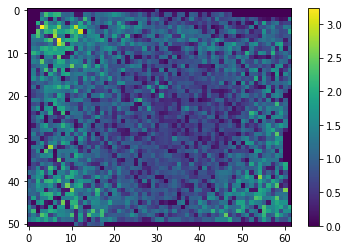

In [72]:
plt.imshow(noise_lev_array[:,:,3000])
plt.colorbar()

In [133]:
(spectra_peaks_, peaks_) = imze.to_peaks(spectra_basline, imze.mzValues)
spec_peaks_ = SpectraRegion(spectra_peaks_, peaks_)

resolution: 0.42493560064609426
minMZ: 99.85986615183215 100.18129684068533
maxMZ: 3499.3446713205863 3499.241166408772
100.18129684068533 3499.241166408772
99.85986615183215 3499.3446713205863
(51, 62, 8001)
(8001,)
background intensity: 0.1625934143286986 -0.2599745184954823 219.24043156246347


Identified peaks for 2089 of 8001 fields
Returning Peaks


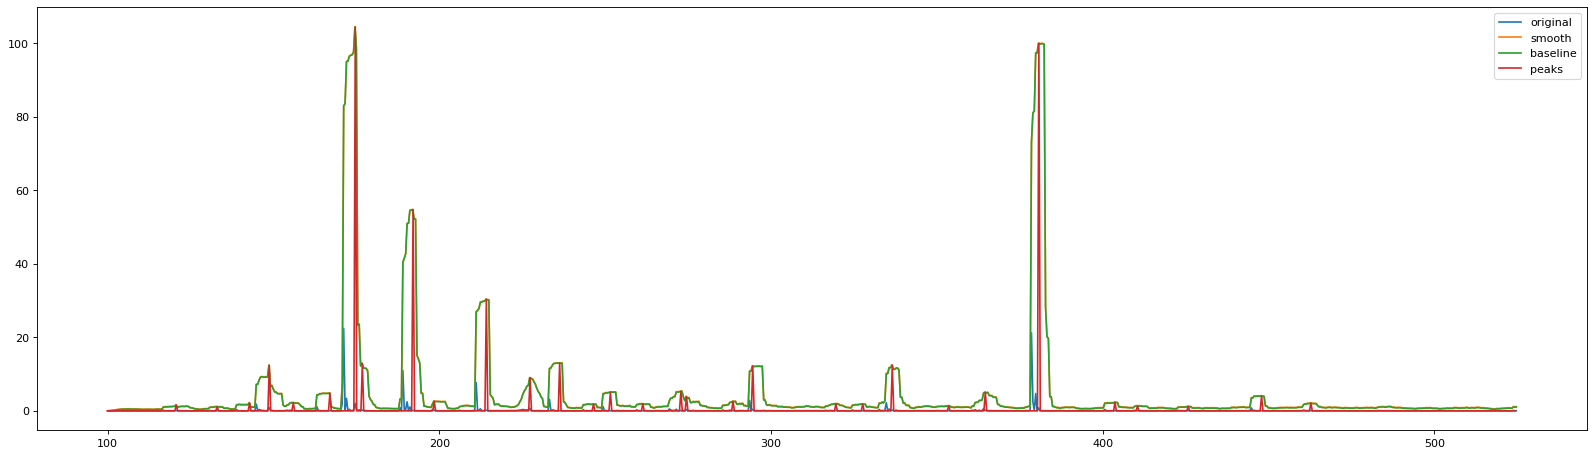

In [134]:
plt.figure(figsize=(25, 7), dpi=80)
lim = 1000
plt.plot(imze.mzValues[:lim], spectra_orig[30,20][:lim], label='original')
plt.plot(imze.mzValues[:lim], spectra_smooth[30,20][:lim], label='smooth')
plt.plot(imze.mzValues[:lim], spectra_basline[30,20][:lim], label='baseline')
plt.plot(peaks[:lim], spectra_peaks[30,20][:lim], label='peaks')
plt.legend()

Elem Matrix (3162, 8001)


/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: divide by zero encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
|##########################################################| 100% Time: 0:05:13


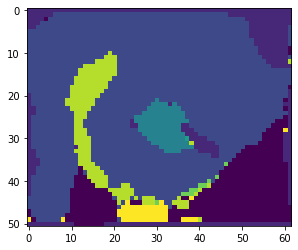

In [129]:
clustering = ModifiedKMeansClusterer(spec_peaks_)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (3162, 8001)


/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
|##########################################################| 100% Time: 0:05:18


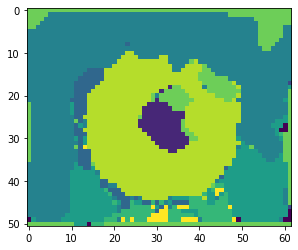

In [135]:
clustering = ModifiedKMeansClusterer(spec_peaks)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (3162, 8001)


|##########################################################| 100% Time: 0:05:19


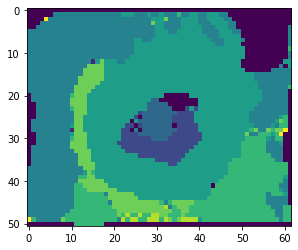

In [50]:
clustering = ModifiedKMeansClusterer(spec_peaks)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (3162, 8001)


/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
/usr/local/hdd/rita/hiwi/Modified_Kmeans_Image_Segmentation/../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: divide by zero encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)
|##########################################################| 100% Time: 0:05:16


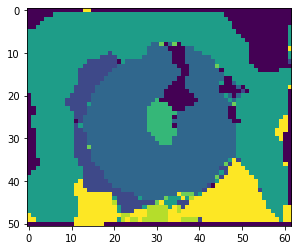

In [61]:
clustering = ModifiedKMeansClusterer(spec_peaks)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

In [87]:
def quantile(x,q):
    n = len(x)
    y = np.sort(x)
    return(np.interp(q, np.linspace(1/(2*n), (2*n-1)/(2*n), n), y))

def prctile(x,p):
    return(quantile(x,np.array(p)/100))

In [183]:
def find_peaks(array_region, noise_lev, peak_width=1):
    output = np.zeros(array_region.shape)
    for ij in range(array_region.shape[0]):
        for j in range(array_region.shape[1]):
            spectrum = array_region[ij,j] 
            
            peaks = list()
            diff_sig = np.diff(spectrum)
            col = len(spectrum)
            for i in range(peak_width,col-peak_width-1):
                flag1 = (diff_sig[i] * diff_sig[i+1] <= 0)
                flag_vett2 = (diff_sig[i-peak_width+1:i-1] > 0)
                flag2 = True
                for k in range(len(flag_vett2)):
                    flag2=(flag2 and flag_vett2[k])
                flag3 = (diff_sig[i] >= 0 and diff_sig[i+1] <= 0)
                flag_vett4 = (diff_sig[i+2:i+peak_width-1] < 0)
                flag4 = True
                for k in range(len(flag_vett4)):
                    flag4 = (flag4 and flag_vett4[k])
                
                if flag1 and flag2 and flag3 and flag4:
                    output[ij,j][i+1] = array_region[ij,j][i+1]
                    peaks.append(i+1)

            
            '''
            noise = noise_lev[ij,j]
            # elimation of the peaks with intensity lower than the noise level

            for ii in range(len(peaks)-1,0,-1):
                if spectrum[peaks[ii]] < noise[peaks[ii]]:
                    output[:,:,peaks[ii]] = 0
            '''
            
            #elimation of the smoothest peaks (based on the slope before and after the peak)
            base=np.ceil(0.5*peak_width)

            #data = np.sort(abs(diff_sig))
            #p_rank = 100.0 * (np.arange(data.size) + 0.5) / data.size
            #perc = np.interp(75, p_rank, data, left=data[0], right=data[-1])

            height_thres = 0.5*base*prctile(abs(diff_sig),75)
            ratio = np.zeros((len(peaks),))

            for il in range(len(peaks)-1, 0, -1):
                p1=peaks[il]-peak_width
                p2=peaks[il]+peak_width
                if p1 >= 1 and p2 <= len(spectrum):
                    height=spectrum[peaks[il]]-0.5*(spectrum[p1]+spectrum[p2])
                    ratio[il]=height
                if ratio[il] < height_thres:
                    output[ij,j][peaks[il]] = 0


    return output

    

In [184]:
stuff = find_peaks(spectra_baseline2, noise_lev_array)

In [180]:
np.ceil(0.5/0.25)

2.0

Elem Matrix (2632, 8000)


|##########################################################| 100% Time: 0:03:43


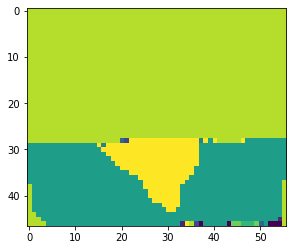

In [185]:
spec_peaks2 = SpectraRegion(stuff, imze.mzValues)
clustering = ModifiedKMeansClusterer(spec_peaks2)
clustering.fit(num_target_clusters=10, init_mode='random')
plt.imshow(clustering.segmentation())

Elem Matrix (2632, 8000)


|##########################################################| 100% Time: 0:03:20


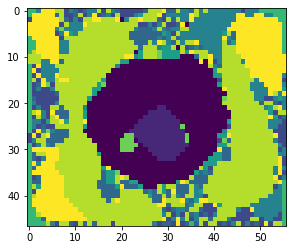

In [176]:
spec_peaks2 = SpectraRegion(stuff, imze.mzValues)
clustering = ModifiedKMeansClusterer(spec_peaks2)
clustering.fit(num_target_clusters=10, init_mode='random')
plt.imshow(clustering.segmentation())

Elem Matrix (2632, 8000)


|##########################################################| 100% Time: 0:03:20


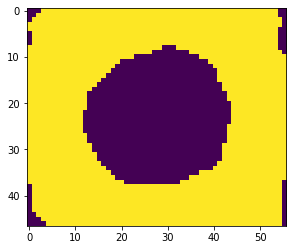

In [166]:
spec_peaks2 = SpectraRegion(stuff, imze.mzValues)
clustering = ModifiedKMeansClusterer(spec_peaks2)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (2632, 8000)


|##########################################################| 100% Time: 0:06:30


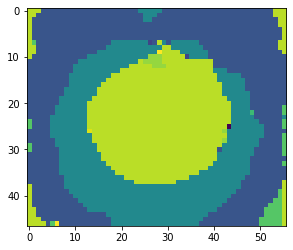

In [169]:
spec_peaks2 = SpectraRegion(stuff, imze.mzValues)
clustering = ModifiedKMeansClusterer(spec_peaks2)
clustering.fit(num_target_clusters=20, init_mode='random')
plt.imshow(clustering.segmentation())

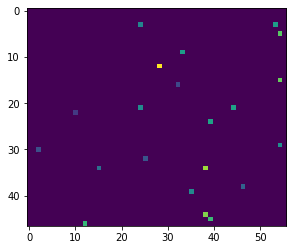

In [157]:
plt.imshow(stuff[:,:,3244])

In [146]:
peaks2

array([  99.85986615,  100.28480175,  100.70973735, ..., 3498.49480012,
       3498.91973572, 3499.34467132])

Fetching region range
|##########################################################| 100% Time: 0:00:00
Fetching region shape
|##########################################################| 100% Time: 0:00:00
Found region 3 with shape (47, 56, 8000)
Fetching region spectra
|##########################################################| 100% Time: 0:00:00
|##########################################################| 100% Time: 0:00:00
Finished region 3 with shape (47, 56, 8000) (0 padded pixels)
|##########################################################| 100% Time: 0:00:00
|##########################################################| 100% Time: 0:00:00


Elem Matrix (2632, 8000)


|##########################################################| 100% Time: 0:03:19


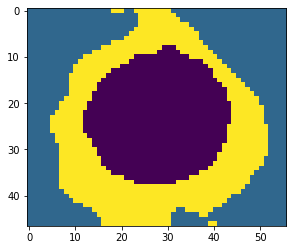

In [158]:
spectra_orig2 = imze.get_region_array(3, makeNullLine=True)
spectra_norm2 = imze.normalize_region_array(spectra_orig2, normalize="tic")
spectra_smooth2 = imze.smooth_region_array(region_array=spectra_norm2, method='kaiser', window_length=10)
spectra_baseline2 = imze.normalize_region_array(region_array=spectra_smooth2, normalize='baseline_cor_local', division=100, simple=True)
#new_reduced_spectra = spectra_baseline2[:,:,stuff]
#spec_peaks3 = SpectraRegion(new_reduced_spectra, stuff)
#(spectra_peaks2, peaks2) = imze.to_peaks(spectra_smooth2, imze.mzValues)
spec_peaks2 = SpectraRegion(stuff, imze.mzValues)
clustering = ModifiedKMeansClusterer(spec_peaks2)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

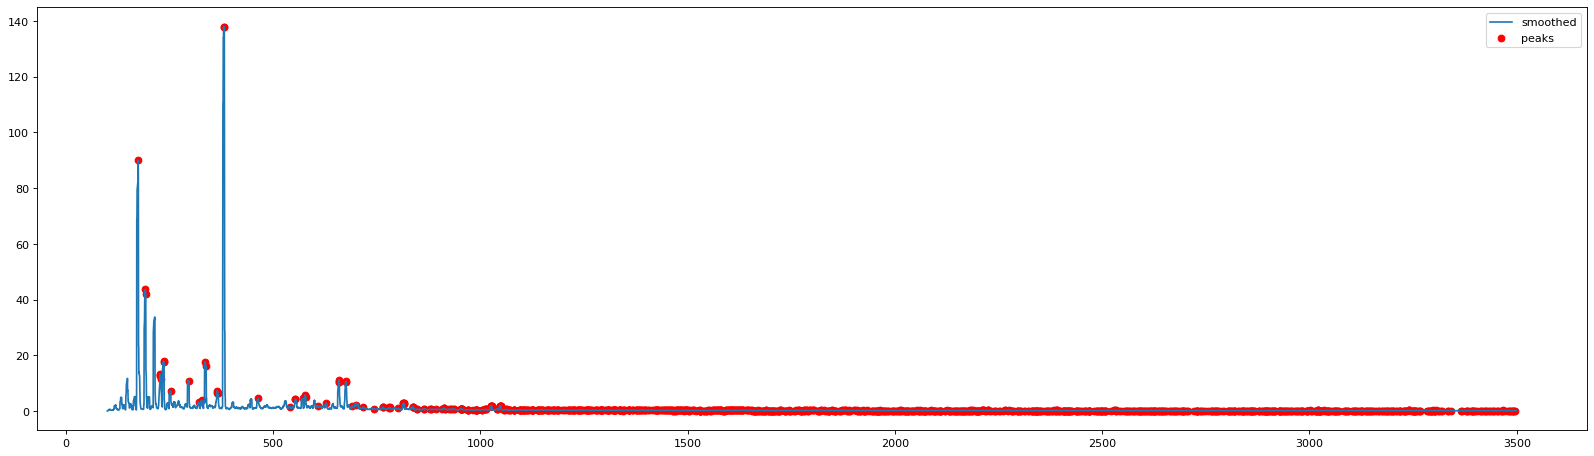

In [121]:
x = 40
y = 20
plt.figure(figsize=(25, 7), dpi=80)
plt.plot(imze.mzValues, spectra_smooth2[x,y], label='smoothed')
plt.scatter(imze.mzValues[stuff], spectra_smooth2[x,y][stuff], label='peaks', c='red')
plt.legend()

In [60]:
def kurtosis_filter(region_array):
    division = 100
    return_array = list()
    for i in range(region_array.shape[0]):
        for j in range(region_array.shape[1]):
            spectrum = region_array[i,j]
            nblocks = len(spectrum)//division

            for block in range(nblocks):
                interval = spectrum[1+(block-1)*division:block*division]
                if kurtosis(interval) <= 1:
                    return_array.append(interval)

    return return_array

In [61]:
kurtosis_array = kurtosis_filter(spectra_smooth)

In [65]:
np.mean(kurtosis_array)

0.45630144306216136

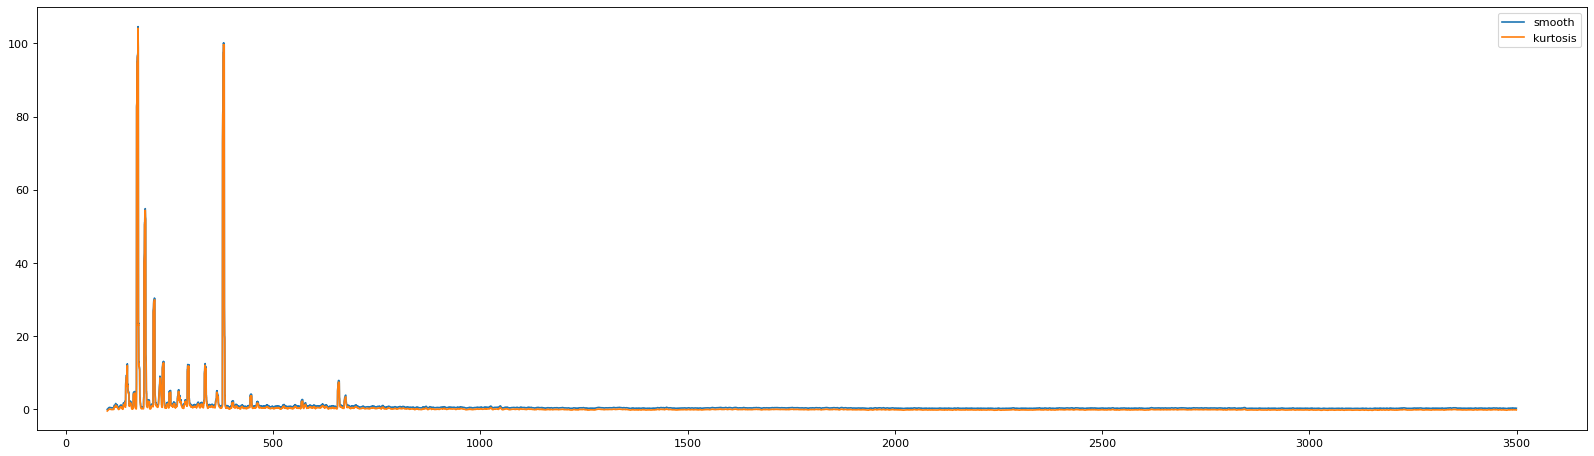

In [66]:
plt.figure(figsize=(25, 7), dpi=80)
plt.plot(imze.mzValues, spectra_smooth[30,20], label='smooth')
plt.plot(imze.mzValues, spectra_smooth[30,20] - np.mean(kurtosis_array), label='kurtosis')
plt.legend()

In [ ]:
(spectra_peaks2, peaks2) = imze.to_peaks(kurtosis_array, imze.mzValues)

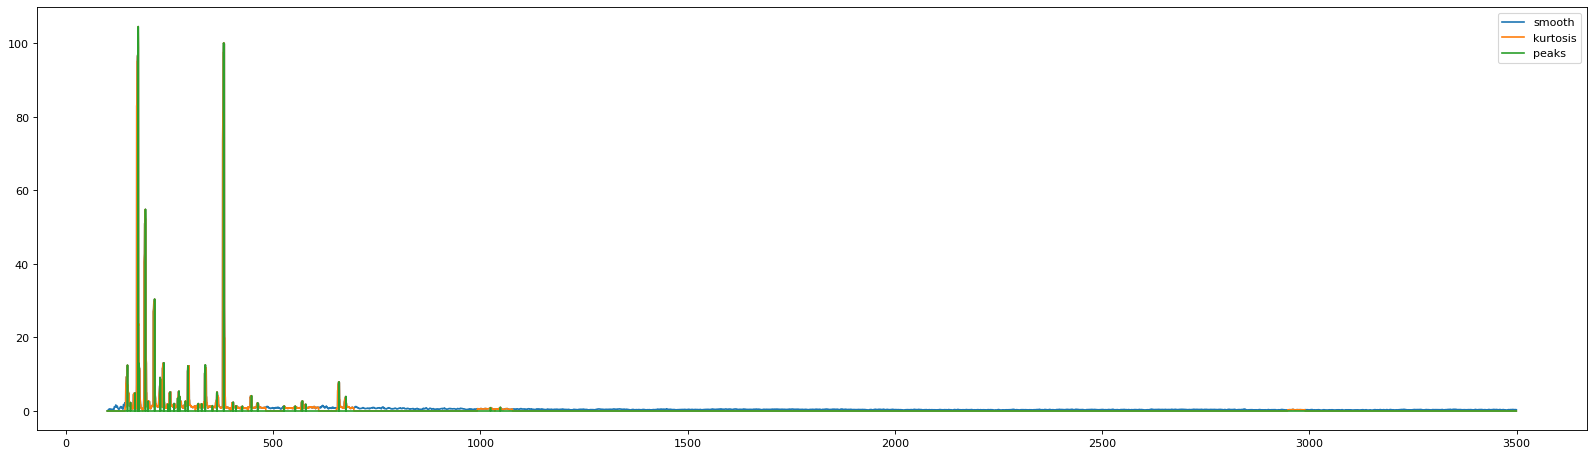

In [48]:
plt.figure(figsize=(25, 7), dpi=80)
plt.plot(imze.mzValues, spectra_smooth[30,20], label='smooth')
plt.plot(imze.mzValues, kurtosis_array[30,20], label='kurtosis')
plt.plot(peaks2, spectra_peaks2[30,20], label='peaks')
plt.legend()

In [49]:
spec_peaks2 = SpectraRegion(spectra_peaks2, peaks2)

Elem Matrix (3162, 8001)


../pyIMS/pIMZ/clustering.py:785: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(np.multiply(specDiff, specDiff), sSumSq)



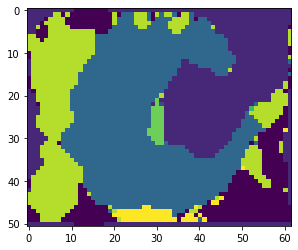

In [50]:
clustering = ModifiedKMeansClusterer(spec_peaks2)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (3162, 8001)


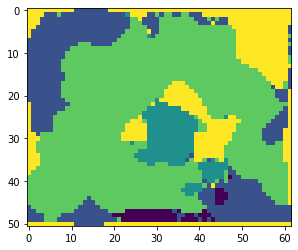

In [51]:
clustering3 = ModifiedKMeansClusterer(spec_peaks2)
clustering3.fit(num_target_clusters=5, init_mode='random_centroids')
plt.imshow(clustering3.segmentation())

Elem Matrix (3162, 8001)


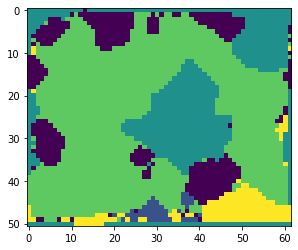

In [52]:
clustering2 = ModifiedKMeansClusterer(spec_peaks2)
clustering2.fit(num_target_clusters=5, init_mode='random')
plt.imshow(clustering2.segmentation())

Elem Matrix (3162, 8001)


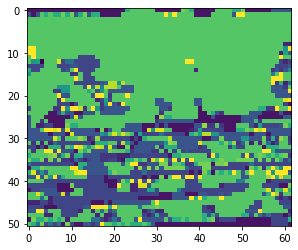

In [53]:
clustering3 = ModifiedKMeansClusterer(spec_peaks2)
clustering3.fit(num_target_clusters=20, max_iterations = 10, init_mode='random', distance='sasa')
plt.imshow(clustering3.segmentation())

Elem Matrix (3162, 8000)


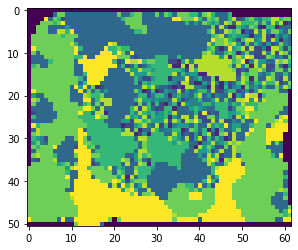

In [47]:
clustering = ModifiedKMeansClusterer(spec)
clustering.fit(num_target_clusters=10, init_mode='random_2normdist', distance='tibshirani')
plt.imshow(clustering.segmentation())

Elem Matrix (3162, 8000)


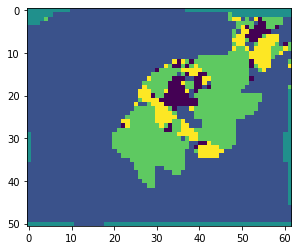

In [48]:
clustering2 = ModifiedKMeansClusterer(spec)
clustering2.fit(num_target_clusters=5, init_mode='random')
plt.imshow(clustering2.segmentation())

Elem Matrix (3162, 8000)


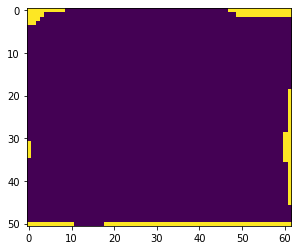

In [8]:
clustering3 = ModifiedKMeansClusterer(spec)
clustering3.fit(num_target_clusters=5, init_mode='random_centroids')
plt.imshow(clustering3.segmentation())

Elem Matrix (3162, 8000)


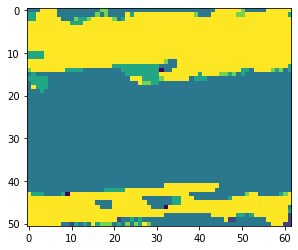

In [21]:
clustering5 = ModifiedKMeansClusterer(spec)
clustering5.fit(num_target_clusters=6, init_mode='random_centroids', distance='sasa')
plt.imshow(clustering5.segmentation())

Elem Matrix (3162, 8000)


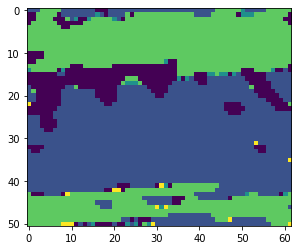

In [29]:
clustering6 = ModifiedKMeansClusterer(spec)
clustering6.fit(num_target_clusters=5, init_mode='random_centroids', distance='sasa', max_iterations=20)
plt.imshow(clustering6.segmentation())

Elem Matrix (3162, 8000)


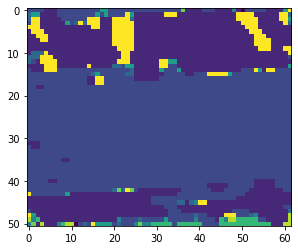

In [30]:
clustering7 = ModifiedKMeansClusterer(spec)
clustering7.fit(num_target_clusters=10, init_mode='random_centroids', distance='sasa', max_iterations=10)
plt.imshow(clustering7.segmentation())

Elem Matrix (3162, 8000)


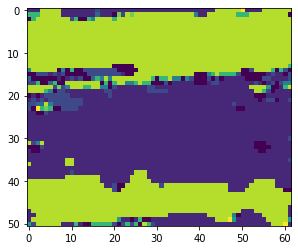

In [31]:
clustering8 = ModifiedKMeansClusterer(spec)
clustering8.fit(num_target_clusters=10, init_mode='random_centroids', distance='sasa', max_iterations=3)
plt.imshow(clustering8.segmentation())

Elem Matrix (3162, 8000)


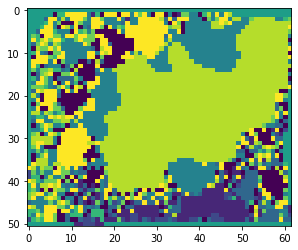

In [35]:
clustering9 = ModifiedKMeansClusterer(spec)
clustering9.fit(num_target_clusters=10, init_mode='random_centroids')
plt.imshow(clustering9.segmentation())

Elem Matrix (3162, 8000)


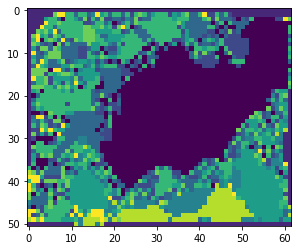

In [36]:
clustering10 = ModifiedKMeansClusterer(spec)
clustering10.fit(num_target_clusters=10, init_mode='random_2normdist')
plt.imshow(clustering10.segmentation())